This is an assignment on Pandas and Matplotlib. These are important tools that will be used in upcoming assignments.

# Import Libraries

We shall start by importing the Python libraries you will need to run the code.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

%matplotlib inline

[Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) and [matplotlib](https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm) go through these tutorials before you start doing the assignment.

## Load the Data
### About the data

The U.S. Census Bureau began asking internet use in American Community Survey (ACS) in 2013, as part of the 2008 Broadband Data Improvement Act, and has published 1-year estimate each year since 2013. The recent 2016 data shows that in many counties, over a quarter of household still do not have internet access.

In [2]:
#Here we load the data
df = pd.read_csv("kaggle_internet.csv")
print('shape of the data:'+str(df.shape))
df.head()

shape of the data:(820, 23)


,county,state,GEOID,lon,lat,P_total,P_white,P_black,P_asian,P_native,...,P_some_high_school,P_high_school_equivalent,P_some_college,P_bachelor_and_above,P_below_poverty,median_age,gini_index,median_household_income,median_rent_per_income,percent_no_internet
0,Anchorage Municipality,AK,05000US02020,-149.274354,61.177549,298192,184841.0,16102.0,27142.0,23916.0,...,8196.0,44804.0,66162.0,70713.0,18302,33.0,0.4018,85634,28.0,6.593887
1,Fairbanks North Star Borough,AK,05000US02090,-146.599867,64.690832,100605,75501.0,4385.0,3875.0,7427.0,...,1527.0,14725.0,24570.0,19257.0,9580,30.6,0.3756,77328,25.6,12.102458
2,Matanuska-Susitna Borough,AK,05000US02170,-149.407974,62.182173,104365,86314.0,1019.0,1083.0,5455.0,...,2755.0,21071.0,28472.0,12841.0,9893,34.2,0.4351,69332,29.6,11.156575
3,Baldwin County,AL,05000US01003,-87.746067,30.659218,208563,180484.0,18821.0,914.0,1383.0,...,10506.0,41822.0,46790.0,43547.0,23375,42.4,0.4498,56732,29.3,17.868167
4,Calhoun County,AL,05000US01015,-85.822513,33.771706,114611,NaN,NaN,NaN,NaN,...,8853.0,24761.0,26625.0,12909.0,18193,39.1,0.4692,41687,24.8,23.464932


In [3]:
## Working with the data

### 1.1 Check the correlation between the column using correlation matrix

In [4]:
#let's write the code for correlation matix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,lon,lat,P_total,P_white,P_black,P_asian,P_native,P_hawaiian,P_others,P_below_middle_school,P_some_high_school,P_high_school_equivalent,P_some_college,P_bachelor_and_above,P_below_poverty,median_age,gini_index,median_household_income,median_rent_per_income,percent_no_internet
lon,1,-0.0543195,-0.104168,-0.0686061,0.132779,-0.168883,-0.28045,-0.375879,-0.124056,-0.137603,-0.0967554,-0.0472412,-0.146114,-0.0753538,-0.0997901,0.243585,0.00689991,0.000626968,-0.0600512,0.0762846
lat,-0.0543195,1,-0.0810874,-0.115944,-0.15708,-0.0717396,-0.0670797,-0.165592,-0.0717894,-0.105721,-0.126938,-0.0892063,-0.0892568,-0.0368961,-0.117663,0.00912444,-0.220039,0.215803,-0.158108,-0.233225
P_total,-0.104168,-0.0810874,1,0.971922,0.747189,0.838708,0.521726,0.340207,0.855374,0.911578,0.966224,0.977597,0.988319,0.96146,0.962629,-0.115311,0.22581,0.172653,0.155607,-0.15354
P_white,-0.0686061,-0.115944,0.971922,1,0.664573,0.745596,0.518515,0.289749,0.763149,0.844091,0.914558,0.95175,0.97405,0.935758,0.913047,-0.0537129,0.231168,0.162942,0.151586,-0.144966
P_black,0.132779,-0.15708,0.747189,0.664573,1,0.498853,0.254333,0.109936,0.530272,0.607151,0.74717,0.781068,0.714326,0.711801,0.786508,-0.135321,0.367019,-0.0206542,0.163333,0.0408523
P_asian,-0.168883,-0.0717396,0.838708,0.745596,0.498853,1,0.415273,0.49067,0.820922,0.847392,0.801515,0.770177,0.803109,0.856748,0.767018,-0.0712122,0.15428,0.250282,0.118461,-0.144779
P_native,-0.28045,-0.0670797,0.521726,0.518515,0.254333,0.415273,1,0.208973,0.507351,0.498016,0.523581,0.491458,0.550494,0.459467,0.529864,-0.135888,0.116599,-0.069212,-0.0160193,0.210119
P_hawaiian,-0.375879,-0.165592,0.340207,0.289749,0.109936,0.49067,0.208973,1,0.295154,0.309052,0.304417,0.318295,0.364193,0.324723,0.288917,-0.0482453,0.00921696,0.120942,0.0987665,-0.0891413
P_others,-0.124056,-0.0717894,0.855374,0.763149,0.530272,0.820922,0.507351,0.295154,1,0.958529,0.900865,0.818371,0.833609,0.770893,0.870034,-0.0929943,0.152059,0.0541779,0.147329,-0.022089
P_below_middle_school,-0.137603,-0.105721,0.911578,0.844091,0.607151,0.847392,0.498016,0.309052,0.958529,1,0.951299,0.877369,0.884949,0.829607,0.925874,-0.112191,0.180362,0.0689269,0.154153,-0.04092


### Correlation
Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.
Check out this [blog](https://www.datascience.com/learn-data-science/fundamentals/introduction-to-correlation-python-data-science) have a good mathematical explanation of correlation and here are the [types](http://benalexkeen.com/correlation-in-python/) of it.



### Drop unncessary columns
Here some columns have high similarity just like correlation between P_white and P_total is 0.9719 so can remove P_white, it won't affect the information extracted from the data.Generally, we do this if we have unncessary columns especially if the dimensions are very high, for example there are 1500 columns. We do this to decrease the computation cost.

In [5]:
#Using the correlation scores make a list of columns to drop and drop the columns.
drop_list=[]
for i in df.columns[[2,16]]:
    drop_list.append(i)
#Begin the code
new_list =df.drop(drop_list,axis =1)
print(new_list)
#End the code

                           county state         lon        lat  P_total  \
0          Anchorage Municipality    AK -149.274354  61.177549   298192   
1    Fairbanks North Star Borough    AK -146.599867  64.690832   100605   
2       Matanuska-Susitna Borough    AK -149.407974  62.182173   104365   
3                  Baldwin County    AL  -87.746067  30.659218   208563   
4                  Calhoun County    AL  -85.822513  33.771706   114611   
5                  Cullman County    AL  -86.869267  34.131923    82471   
6                   DeKalb County    AL  -85.803992  34.460929    70900   
7                   Elmore County    AL  -86.142739  32.597229    81799   
8                   Etowah County    AL  -86.034420  34.047638   102564   
9                  Houston County    AL  -85.296398  31.158193   104056   
10               Jefferson County    AL  -86.896536  33.553444   659521   
11              Lauderdale County    AL  -87.650997  34.904122    92318   
12                     Le


## 2.0 Plot the data

After loading the data and removing unnecessary columns now we are going to visualize the data by scatter plot, line plot, histogram plot and few more using [matplotlib](https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm) library.
We will define functions for each plot to make our code re-usable.

But before plotting, you must set some parameters common to all the plots. This is done in order to make the visibility and readability of the plots better. This can be done by changing the default rc settings defined in the matplotlibrc configuration files. One example is given.

In [10]:
#Set plot size to 14" x 7" (Solved Example)
plt.rc('figure',figsize=(14,7))

#Set the font size to 15


#Do not display the top and right frame lines

#You can try experimenting with the background color, grid lines and font style

## 2.1 Scatter Plot

This is the most used plot for gaining insight into data while dealing with Machine Learning problems. For your convenience, the code for scatter plot is given as an example.

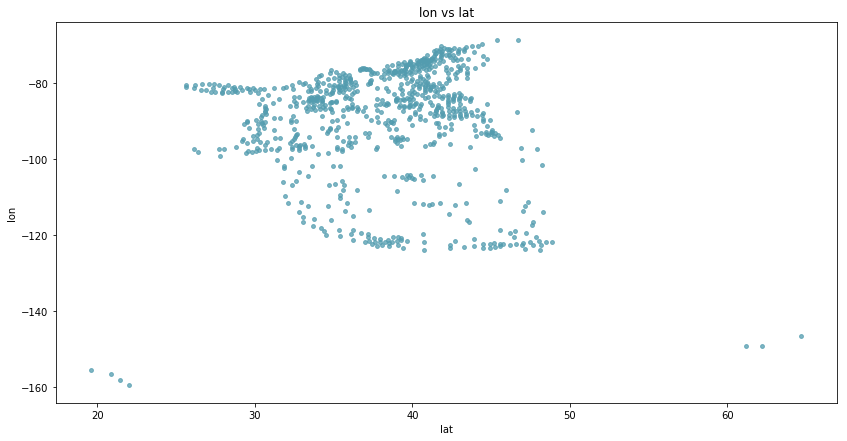

In [11]:
def scatter_plot(x_data, y_data, x_label, y_label, title):
    
    plt.scatter(x_data, y_data, s = 15, color = '#539caf', alpha = 0.75)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    
scatter_plot(x_data = df['lat']
            , y_data = df['lon'] 
            , x_label = 'lat'
            , y_label = 'lon'
            , title = 'lon vs lat')

## 2.2 Histogram

Now here your task is to complete this histogram function

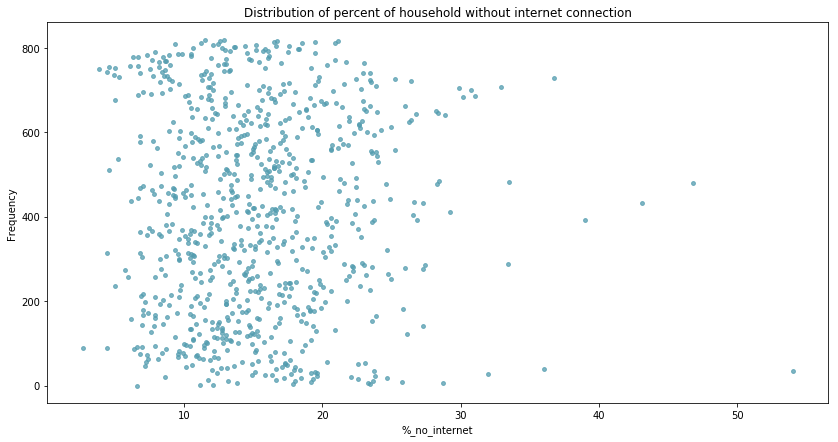

In [12]:
#Fill the function given below
def histogram(data, x_label, y_label, title):
    #Begin the code
    plt.scatter(data ,y, s = 15, color = '#539caf', alpha = 0.75)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

y=df.index

#End the code    
#Calling the function "histogram"
histogram(data = df['percent_no_internet']
           , x_label = '%_no_internet'
           , y_label = 'Frequency'
           , title = 'Distribution of percent of household without internet connection')

## 2.3 Line plot

Import the data for line plot.

In [13]:
df2=pd.read_csv('day.csv')
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

%matplotlib inline

In [15]:
plt.rc('figure',figsize=(14,7))

Similarly complete the lineplot function

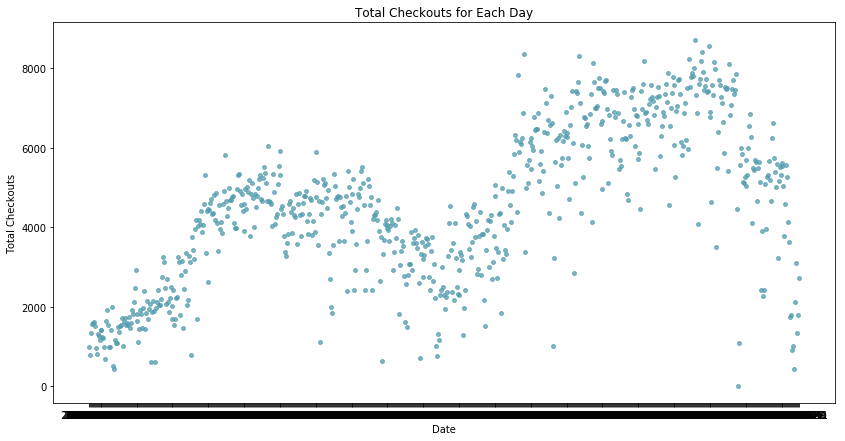

In [16]:
#Fill the function given below

def lineplot(x_data, y_data, x_label, y_label, title):
    #Begin the code
    plt.scatter(x_data ,y_data ,s=15 ,color='#539caf',alpha=0.75 )
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


#End the code    
#Calling the function to create plot
lineplot(x_data = df2['dteday']
         , y_data = df2['cnt']
         , x_label = 'Date'
         , y_label = 'Total Checkouts'
         , title = 'Total Checkouts for Each Day')


## 2.4 Subplots

The Matplotlib subplot() function can be called to plot two or more plots in one figure. Matplotlib supports all kind of subplots including 2x1 vertical, 2x1 horizontal or a 2x2 grid.
Sometimes there is a need to plot subplot. Here, for example, we plot histogram and scatter plot together.

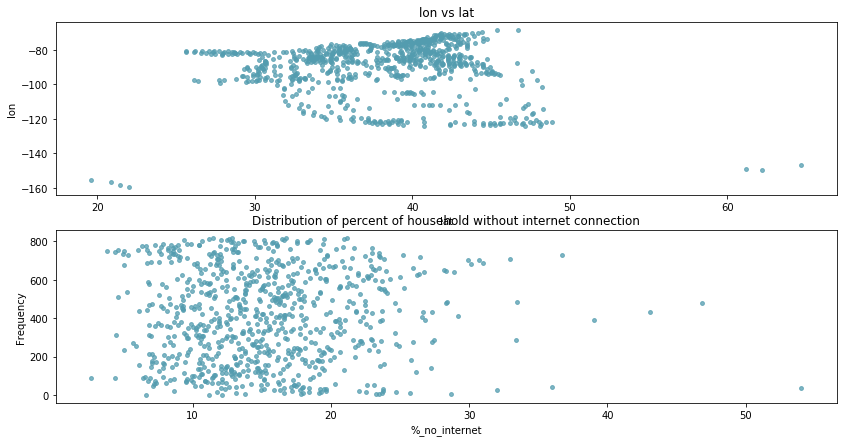

In [17]:
plt.subplot(211)
scatter_plot(x_data = df['lat']
            , y_data = df['lon'] 
            , x_label = 'lat'
            , y_label = 'lon'
            , title = 'lon vs lat')
plt.subplot(212)
histogram(data = df['percent_no_internet']
           , x_label = '%_no_internet'
           , y_label = 'Frequency'
           , title = 'Distribution of percent of household without internet connection')

Here, your task is to write the code for subplot having two line plots.

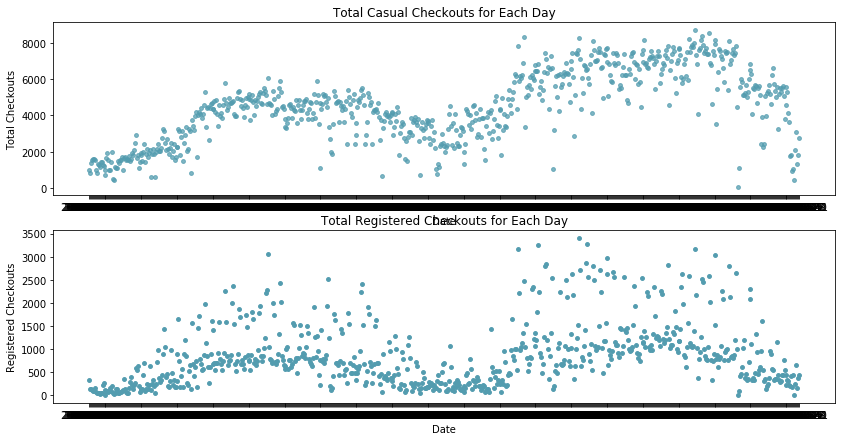

In [18]:
#Complete the function

    #Begin the code
def lineplot1(x1_data, y1_data, x1_label, y1_label, title1):  
        #Begin the code
    plt.scatter(x1_data ,y1_data ,s=15 ,color='#539caf',alpha=0.75 )
    plt.title(title1)
    plt.xlabel(x1_label)
    plt.ylabel(y1_label)


#End the code    
#Calling the function to create plot
plt.subplot(2,1,1)
lineplot1(x1_data = df2['dteday']
          , y1_data = df2['cnt']
          , x1_label = 'Date'
          , y1_label = 'Total Checkouts'
          , title1 = 'Total Casual Checkouts for Each Day')





def lineplot2(x2_data, y2_data, x2_label, y2_label, title2 ,alpha=0.75):
        #Begin the code
    plt.scatter(x2_data ,y2_data ,s=15 ,color='#539caf' )
    plt.title(title2)
    plt.xlabel(x2_label)
    plt.ylabel(y2_label)


#End the code    
#Calling the function to create plot
plt.subplot(2,1,2)
lineplot2(x2_data = df2['dteday']
          , y2_data = df2['casual']
          , x2_label = 'Date'
          , y2_label = 'Registered Checkouts'
          , title2 = 'Total Registered Checkouts for Each Day')
#End the code        
#Calling the function to create subplot





## 2.5 Comparing Two Line Plots

This is useful for comparing two variables over a third variable. It must be noted that these variables may have different scales (they do in the example given below).

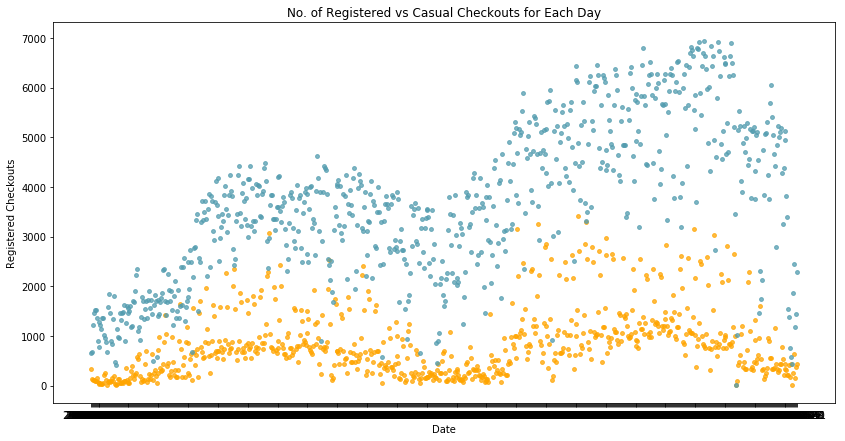

In [20]:
#Fill the function given below
def lineplot2y(x_data, x_label, y1_data, y1_label, y2_data, y2_label, title):
    plt.scatter(x_data ,y1_data ,s=15 ,color='orange',alpha=0.75 )
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y1_label)
    #Begin the code
    plt.scatter(x_data ,y2_data ,s=15 ,color='#539caf',alpha=0.75 )
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y2_label)






#End the code       
#Calling the function to create plot
lineplot2y(x_data = df2['dteday']
           , x_label = 'Date'
           , y1_data = df2['casual']
           , y1_label = 'Casual Checkouts'
           , y2_data = df2['registered']
           , y2_label = 'Registered Checkouts'
           , title = 'No. of Registered vs Casual Checkouts for Each Day')


# It's Finished
Congratulations! you have completed your first assignment.There are lots of plots you can explore, these plots will help you to visualize data in your upcoming assignment.You can also perform numpy operations on the given data.


PS:You need to submit this Python notebook for this part of the assignment.